In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/netflix_tv_with_hit.csv")
print(df.shape)
display(df.head())

(2020, 20)


,adult,backdrop_path,genre_ids,id,origin_country,original_language,original_name,overview,popularity,poster_path,first_air_date,name,vote_average,vote_count,genres,year,month,day,primary_country,hit
0,False,/8zbAoryWbtH0DKdev8abFAjdufy.jpg,"[10765, 9648, 10759]",66732,['US'],en,Stranger Things,"When a young boy vanishes, a small town uncove...",1393.7498,/uOOtwVbSr4QDjAGIifLDwpb2Pdl.jpg,2016-07-15,Stranger Things,8.588,20079,"['Sci-Fi & Fantasy', 'Mystery', 'Action & Adve...",2016.0,7.0,15.0,US,1
1,False,/lr0h0OBj7QOEvkaX5g3JWoaKZsI.jpg,"[10759, 18]",238458,['KR'],ko,캐셔로,An ordinary man who inherits super strength di...,127.2497,/dm6RoaKgkGUxckamMDzsbqtLhFv.jpg,2025-12-26,Cashero,7.274,42,"['Action & Adventure', 'Drama']",2025.0,12.0,26.0,KR,1
2,False,/n69QxkZ0RRc6PMNnxD9U0MZnLzl.jpg,[10764],4656,['US'],en,Raw,"A regularly scheduled, live, year-round progra...",120.4042,/pv5WNnLUo7mpT8k901Lo8UovrqI.jpg,1993-01-11,Raw,6.787,347,['Reality'],1993.0,1.0,11.0,US,1
3,False,/ncftkNAjIz2PBbUMY7T0CHVJP8d.jpg,"[80, 10765]",63174,['US'],en,Lucifer,"Bored and unhappy as the Lord of Hell, Lucifer...",96.9141,/ekZobS8isE6mA53RAiGDG93hBxL.jpg,2016-01-25,Lucifer,8.437,15239,"['Crime', 'Sci-Fi & Fantasy']",2016.0,1.0,25.0,US,1
4,False,/foGkPxpw9h8zln81j63mix5B7m8.jpg,"[18, 10759]",71912,['US'],en,The Witcher,"Geralt of Rivia, a mutated monster-hunter for ...",88.9080,/AoGsDM02UVt0npBA8OvpDcZbaMi.jpg,2019-12-20,The Witcher,7.958,6470,"['Drama', 'Action & Adventure']",2019.0,12.0,20.0,US,1


# **General Featurs EDA**

In [24]:
top_countries = df['primary_country'].value_counts().nlargest(20).index

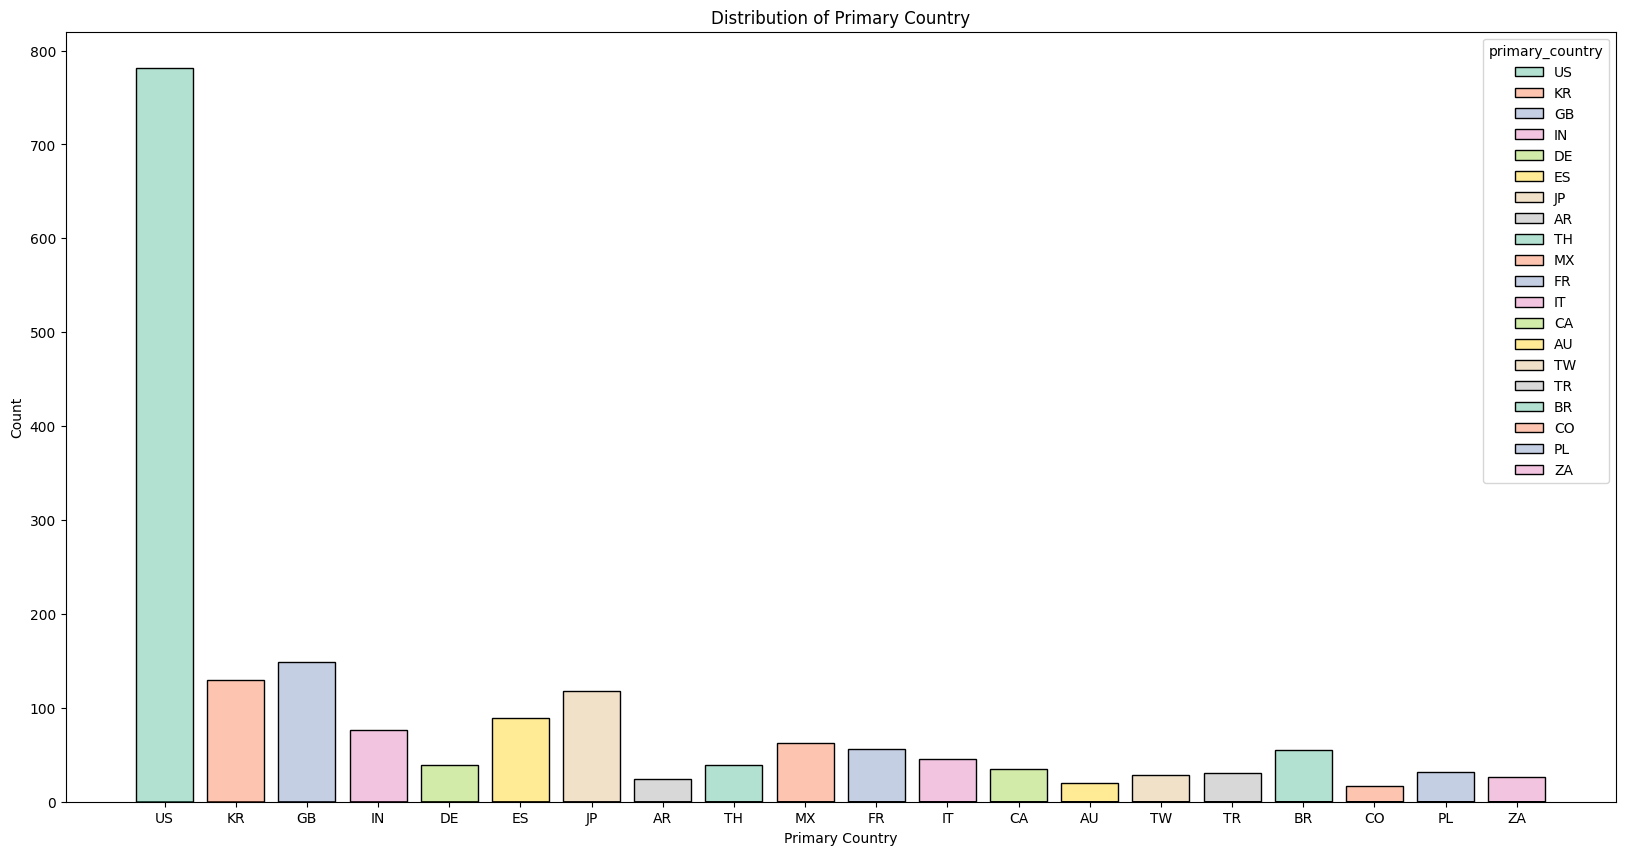

In [62]:
plt.figure(figsize=(20,10))
sns.histplot(data=df[df['primary_country'].isin(top_countries)],
                x='primary_country',
                palette="Set2",
                hue='primary_country',
                shrink=0.8)
plt.title('Distribution of Primary Country')
plt.xlabel('Primary Country')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [29]:
df["genres"].head(5)
type(df["genres"].iloc[0])

str

In [30]:
import ast

df["genres"] = df["genres"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else x
)

df["primary_genre"] = df["genres"].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None
)

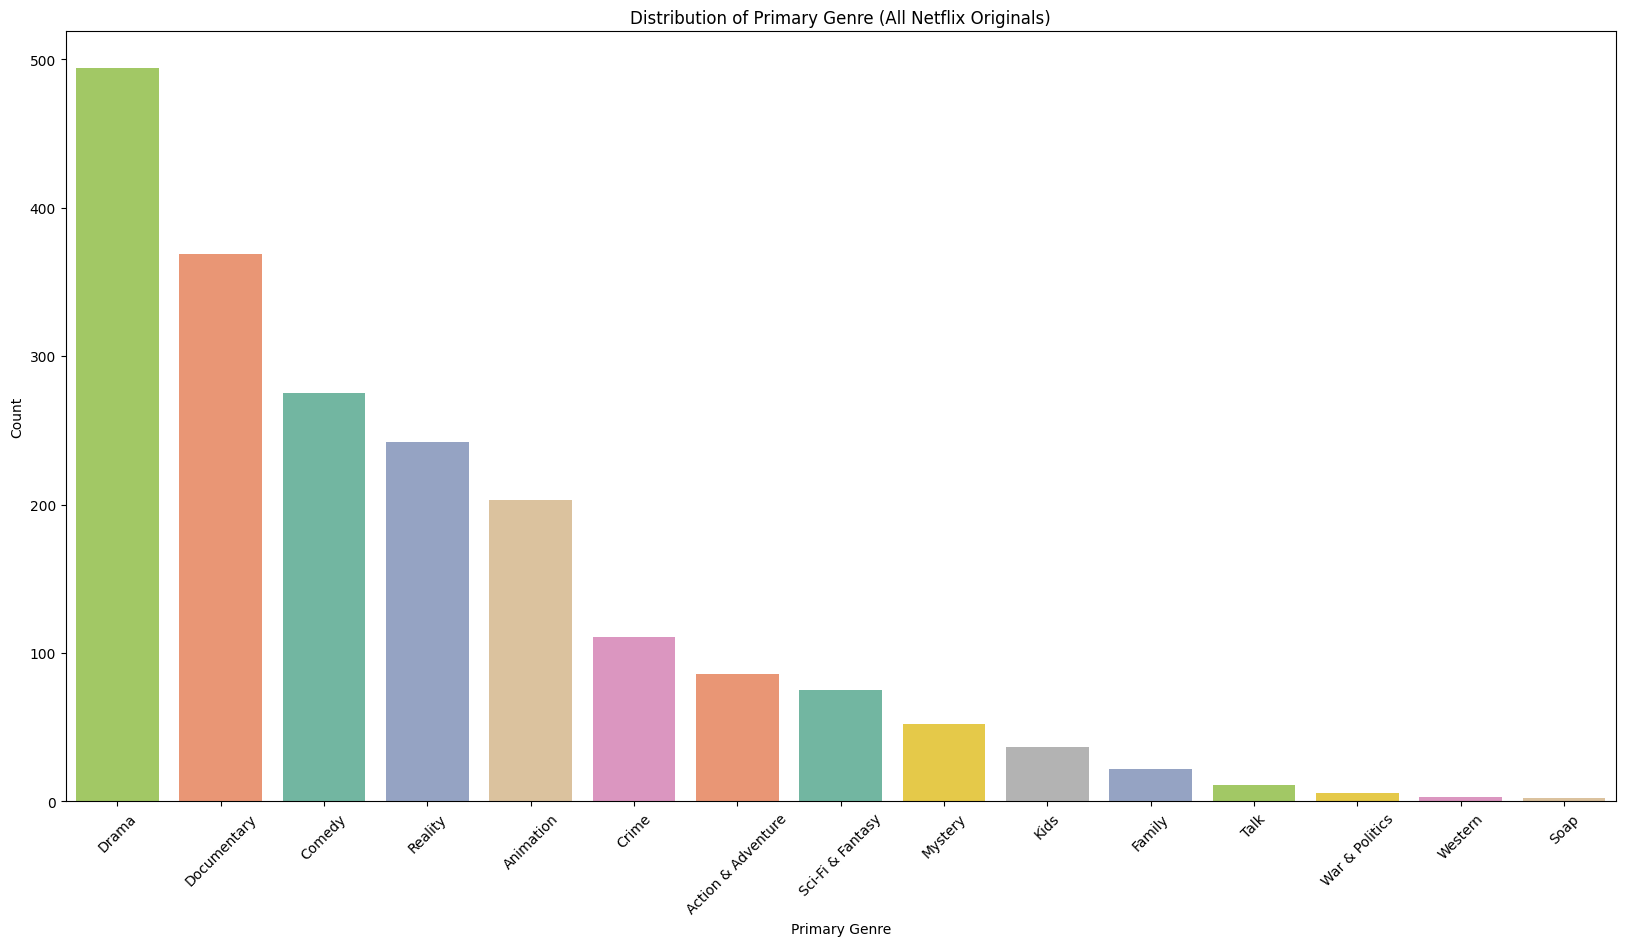

In [45]:
top_genres = df['primary_genre'].value_counts().nlargest(20).index

plt.figure(figsize=(20,10))
sns.countplot(
    data=df[df["primary_genre"].isin(top_genres)],
    x="primary_genre",
    order=top_genres,
    palette="Set2",
    hue='primary_genre'
)

plt.title("Distribution of Primary Genre (All Netflix Originals)")
plt.xlabel("Primary Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

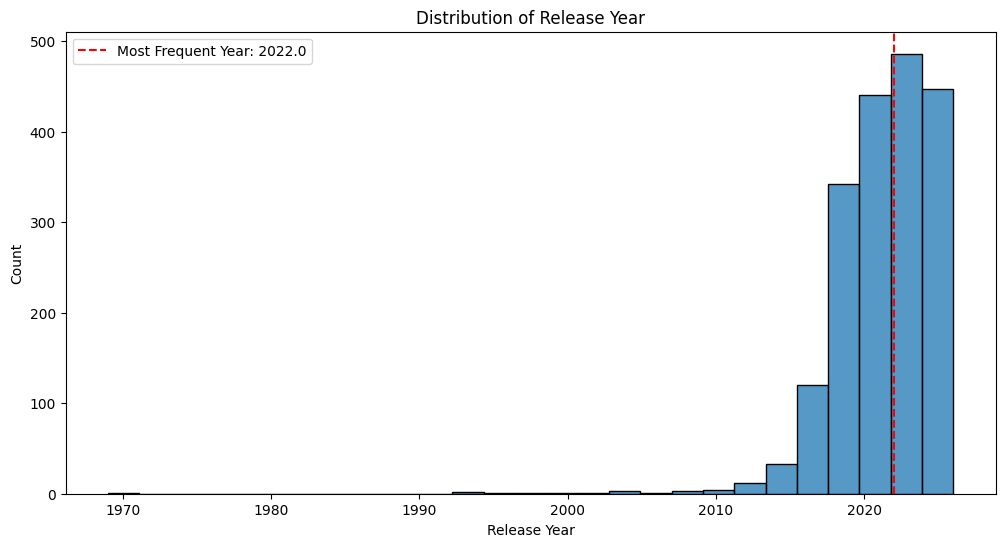

In [60]:
most_freq_year = df["year"].mode().iloc[0]

plt.figure(figsize=(12,6))
sns.histplot(x="year", data=df, bins=df['year'].nunique())
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.axvline(x=most_freq_year, color="red", linestyle="--", label=f"Most Frequent Year: {most_freq_year}")
plt.legend()
plt.show()

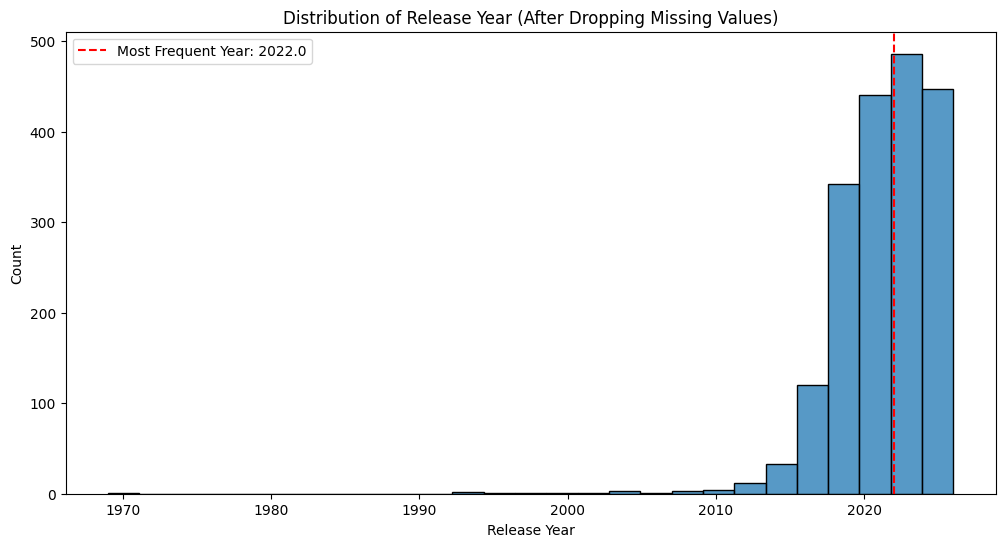

In [61]:
df_year = df.dropna(subset=["year"])
plt.figure(figsize=(12,6))
sns.histplot(data=df_year, x="year", bins=df_year['year'].nunique())
plt.title("Distribution of Release Year (After Dropping Missing Values)")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.axvline(x=most_freq_year, color="red", linestyle="--", label=f"Most Frequent Year: {most_freq_year}")
plt.legend()
plt.show()

## General Observations
- Netflix Originals are heavily concentrated in recent years, with a sharp increase after 2016 and a peak around 2022.
- Drama, Documentary, and Comedy dominate Netflix Original content, while many genres exhibit a long-tail distribution.
- Although the US produces the majority of titles, Netflix Originals show significant international diversity, especially from Korea, the UK, and Japan.

# **Hit Feature EDA**

In [63]:
df['hit'].value_counts(normalize=True)

hit
0    0.909406
1    0.090594
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Hit vs Non-Hit Distribution')

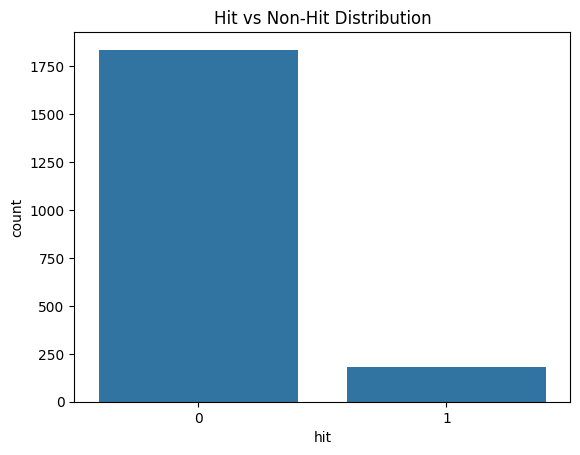

In [64]:
sns.countplot(data=df, x='hit')
plt.title("Hit vs Non-Hit Distribution")

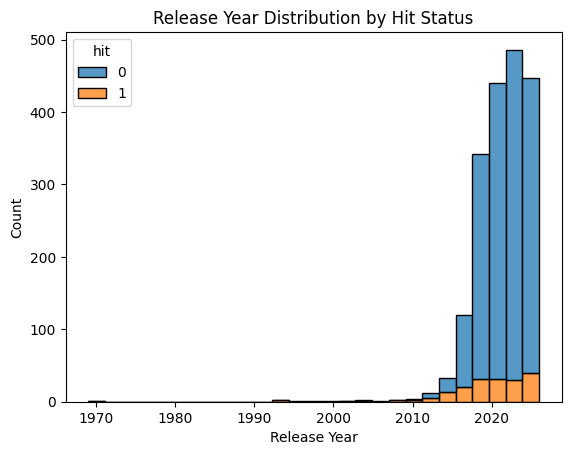

In [66]:
sns.histplot(data=df, x='year', hue='hit', bins=df['year'].nunique(), multiple='stack')
plt.title("Release Year Distribution by Hit Status")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

- Both hit and non-hit titles are heavily concentrated after 2015, reflecting the rapid expansion of Netflix Originals in recent years.
- Hit titles show a stronger concentration in the most recent years compared to non-hits.

**Interpretation**

This pattern suggests a temporal skew in the hit label. Because newer titles benefit from:
- wider global distribution,
- higher platform traffic,
- and more accumulated audience feedback,
they are more likely to meet the rating-based threshold used to define a hit.


**Implication**

The hit label is not temporally neutral. It likely captures not only audience preference, but also exposure and platform scale effects.
This bias should be considered in later modeling or interpretation, especially when comparing titles across different release periods.

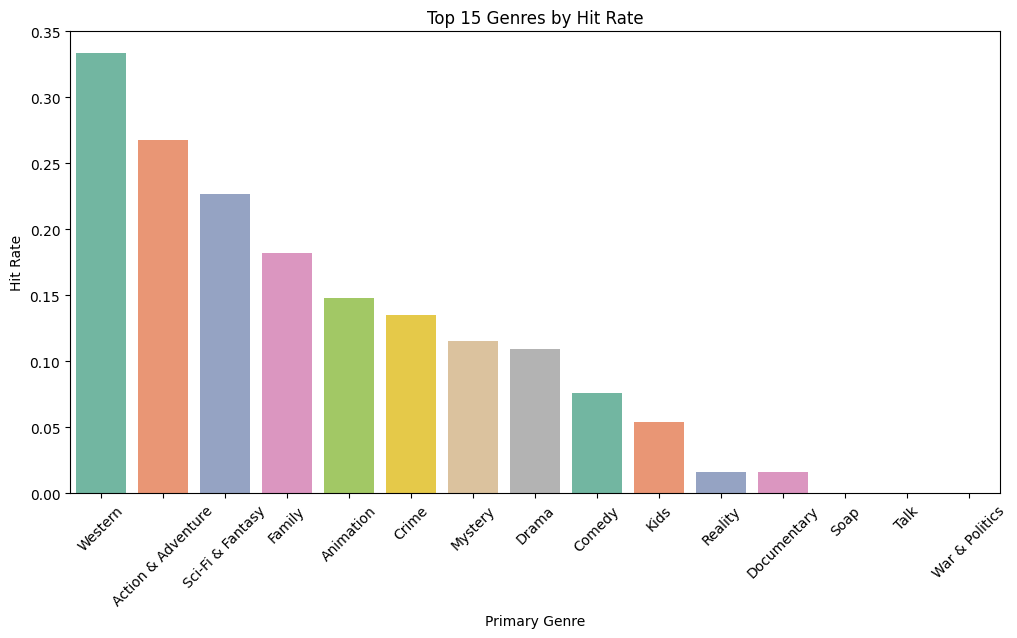

In [69]:
genre_hit_rate = (
    df.groupby('primary_genre')['hit']
      .mean()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_hit_rate.index, y=genre_hit_rate.values, palette="Set2", hue=genre_hit_rate.index)
plt.title("Top 15 Genres by Hit Rate")
plt.xlabel("Primary Genre")
plt.ylabel("Hit Rate")
plt.xticks(rotation=45)
plt.show()

In [72]:
df[df['primary_genre']=="Western"].shape

(3, 21)

- Genres such as Western, Action & Adventure, and Sci-Fi & Fantasy exhibit relatively high hit rates.
- High-volume genres like Drama and Documentary show lower hit probabilities despite producing many titles.
- Several genres (e.g., Reality, Documentary) rarely cross the hit threshold.


**Interpretation**

- Rather than reflecting sheer production volume, hit rates highlight conditional success:
- given that a title exists within a genre, how likely it is to be classified as a hit.

This suggests that certain genres may be more aligned with:
- audience enthusiasm,
- event-driven consumption,
- or franchise-style engagement.


**Caveat**
Some genres with high hit rates have small sample sizes, which may inflate their apparent success.
Therefore, genre-level results should be interpreted as descriptive patterns, not causal claims.

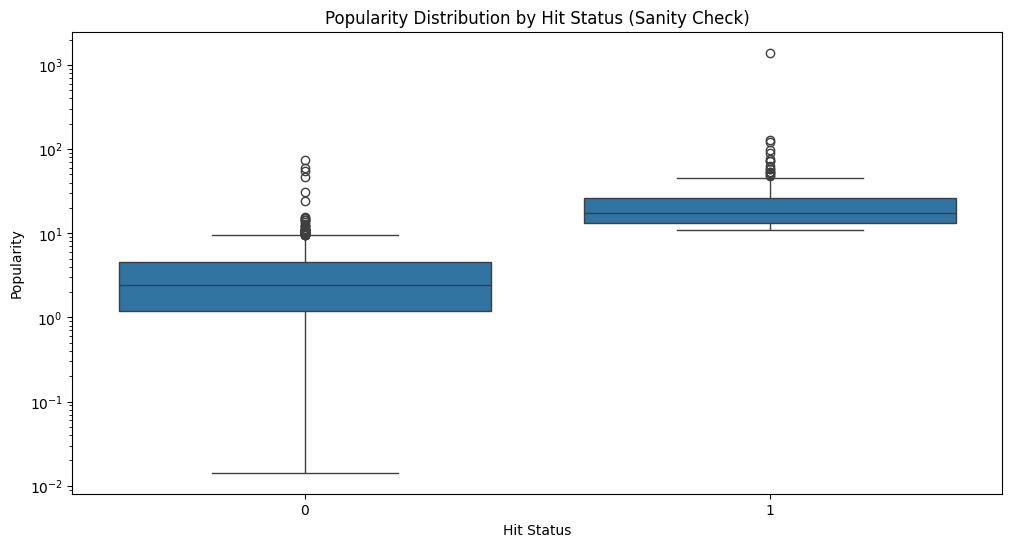

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='hit', y='popularity')
plt.title("Popularity Distribution by Hit Status (Sanity Check)")
plt.xlabel("Hit Status")
plt.yscale("log")
plt.ylabel("Popularity")
plt.show()

### Popularity Distribution by Hit Status

As expected, titles labeled as hits exhibit substantially higher popularity values than non-hit titles.  
This separation is mechanically induced, as popularity is directly used in the hit definition.

Accordingly, this plot is included solely to verify correct label construction and is not interpreted as evidence of an independent relationship.
